In [1]:
import numpy as np #математические вычисления
import pandas as pd #обработка и анализ структурированных данных (панельных данных)
import pandas_datareader.data as web # импорт данных с fred
import matplotlib.pyplot as plt # визуализация

from statsmodels.tsa.api import ARIMA # model adjustment
from statsmodels.stats.api import het_arch, acorr_ljungbox # diagnostics
from statsmodels.graphics.tsaplots import plot_predict # prediction construction

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

# 1 задание

In [4]:
y = web.DataReader(name='MORTGAGE15US', data_source='fred', start='2010-01-01', end='2024-01-31')
y = y.diff().dropna()

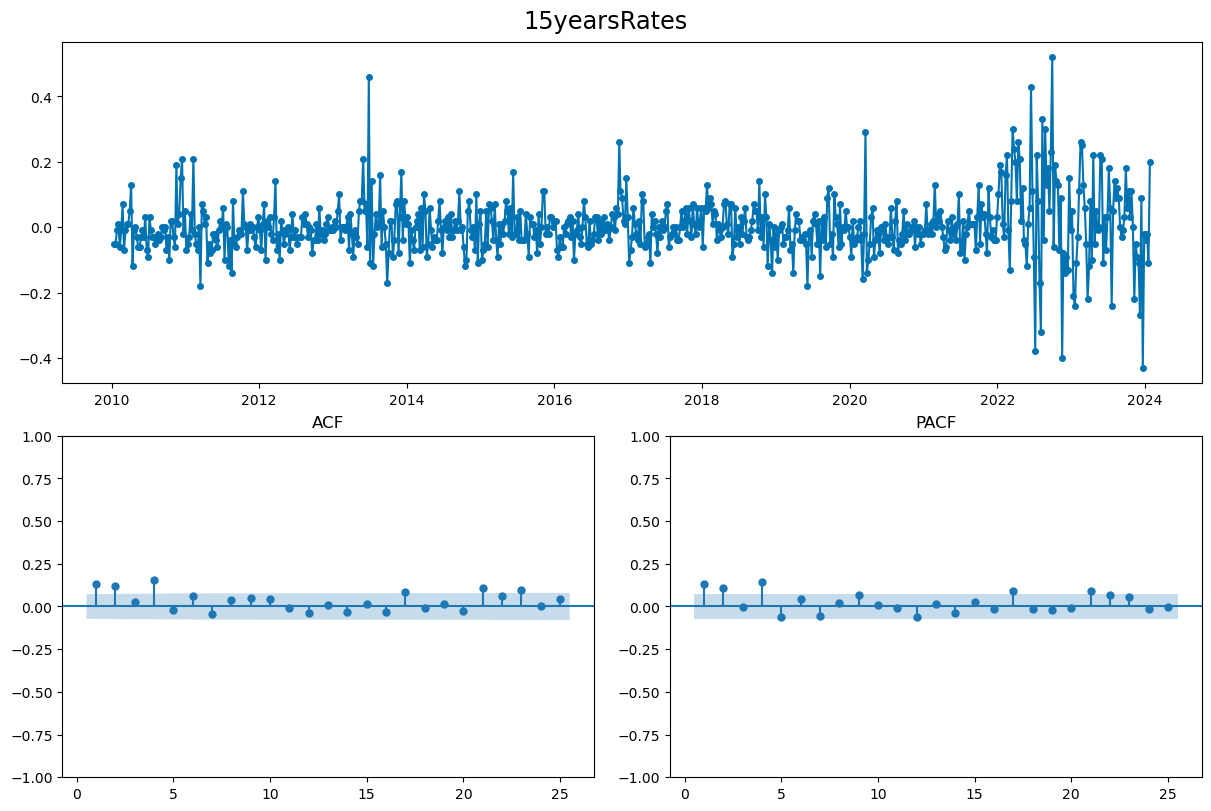

In [5]:
from sktime.transformations.series.acf import AutoCorrelationTransformer, PartialAutoCorrelationTransformer
from sktime.utils.plotting import plot_correlations

# zero_lag - убираем первый лаг или нет
plot_correlations(y, lags=25, zero_lag=False, alpha=0.05, suptitle='15yearsRates', acf_title='ACF', pacf_title='PACF')

plt.show()

In [7]:
acf_transformer = AutoCorrelationTransformer(n_lags=3)
acf_transformer.fit_transform(y).round(3)

,MORTGAGE15US
0,1.000
1,0.132
2,0.121
3,0.025


##### Значение $r(2)$ = 0.121

# 2 задание

In [13]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

In [8]:
y = web.DataReader(name='MORTGAGE30US', data_source='fred', start='2005-01-01', end='2024-01-31')

In [16]:
forecaster = AutoARIMA(information_criterion='hqic', test='adf', seasonal=False, max_p=10, max_q=10)

forecaster.fit(y)
forecaster.get_fitted_params()

{'ar.L1': -0.28765718037286675,
 'ar.L2': 0.4915247409141091,
 'ma.L1': 0.35368241243050264,
 'ma.L2': -0.333770303262349,
 'sigma2': 0.009139247591883127,
 'order': (2, 1, 2),
 'seasonal_order': (0, 0, 0, 0),
 'aic': -1835.96184846903,
 'aicc': -1835.9011197240907,
 'bic': -1811.4531624357471,
 'hqic': -1826.6441169790764}

##### При заданных параметрах наиболее эффективной будет модель ARIMA(2,1,2)

# 3 задание

In [17]:
y = web.DataReader(name='WAAA', data_source='fred', start='2005-01-01', end='2024-01-31')

In [26]:
from statsmodels.tsa.api import ARIMA # model adjustment

In [28]:
# спецификация модели
mod = ARIMA(y, order=(1,2,1), trend='n', missing='drop')
# подгонка модели на данных
res = mod.fit()
# выводим результаты подгонки
res.summary(alpha=0.01)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WAAA   No. Observations:                  995
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 939.065
Date:              lun., 14 avr. 2025   AIC                          -1872.130
Time:                        16:33:28   BIC                          -1857.428
Sample:                    01-07-2005   HQIC                         -1866.540
                         - 01-26-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.L1          0.1921      0.014     13.519      0.000       0.156       0.229
ma.L1         -0.9999      0.089    -11.284      0.000      -1.228      -0.772
sigma2         0.0088      0.001     11.065      0.000       0.007       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3675.41
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model_df = len(res.params)-1
# для тест отбрасываем первые d остатков (d=mod.k_diff)
acorr_ljungbox(res.resid[mod.k_diff:], lags=[8], model_df=model_df)

,lb_stat,lb_pvalue
8,15.349518,0.017706


### При уровне значимости 1% отклонить гипотезу H0 не можем, автокорреляция в остатках до лага 8 не наблюдается.

# 4 задание

In [ ]:
y = web.DataReader(name='MORTGAGE30US', data_source='fred', start='2005-01-01', end='2024-01-31')

In [33]:
# спецификация модели
mod = ARIMA(y, order=(2,1,0), trend='n', missing='drop')
# подгонка модели на данных
res = mod.fit()
# выводим результаты подгонки
res.summary(alpha=0.01)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           MORTGAGE30US   No. Observations:                  995
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 919.109
Date:              lun., 14 avr. 2025   AIC                          -1832.218
Time:                        16:41:29   BIC                          -1817.513
Sample:                             0   HQIC                         -1826.627
                                - 995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.L1          0.0548      0.019      2.869      0.004       0.006       0.104
ar.L2          0.1454      0.020      7.426      0.000       0.095       0.196
sigma2         0.0092      0.000     43.032      0.000       0.009       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1411.42
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.60
Prob(H) (two-sided):                  0.53   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### $\phi_1 = 0.055$
#### $\phi_2 = 0.145$

# 6 задание

In [34]:
y = web.DataReader(name='WAAA', data_source='fred', start='2005-01-01', end='2024-01-31')

In [48]:
# спецификация модели
mod = ARIMA(y, order=(1,2,0), trend='n', missing='drop')
# подгонка модели на данных
res = mod.fit()


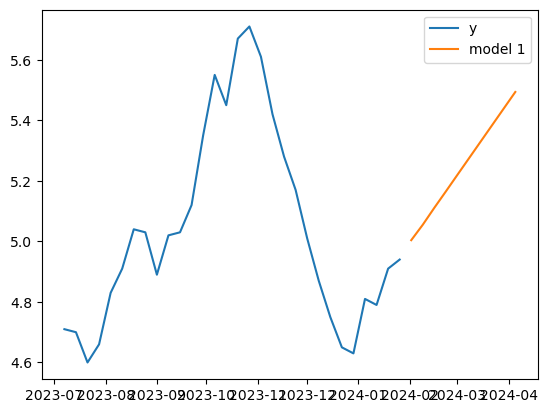

2024-02-02    5.004022
2024-02-09    5.055183
2024-02-16    5.111206
2024-02-23    5.165391
2024-03-01    5.220270
2024-03-08    5.274887
2024-03-15    5.329603
2024-03-22    5.384282
2024-03-29    5.438975
2024-04-05    5.493663
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [52]:
forecasts = res.forecast(steps=10)

plt.plot(y.tail(30), label='y')
plt.plot(res.forecast(steps=10), label='model 1')

plt.legend()
plt.show()
print(forecasts)

In [51]:
print("Прогноз на один шаг вперед:",forecasts[0].round(4))

Прогноз на один шаг вперед: 5.004


# 7 задание

In [53]:
y = web.DataReader(name='MORTGAGE15US', data_source='fred', start='2010-01-01', end='2024-01-31')
y = y.diff().dropna()

<Axes: xlabel='DATE'>

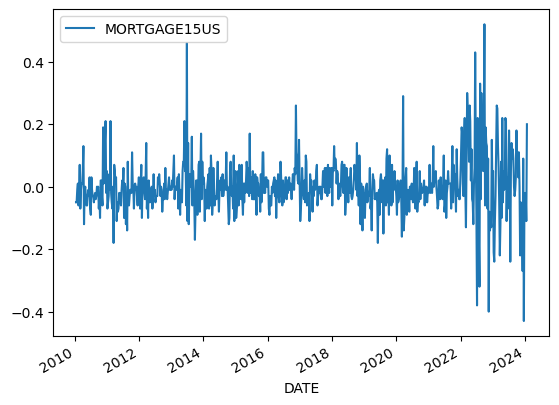

In [54]:
y.plot()

##### Уже графически можно заметить, как начиная с 2022 года усилилась волатильность изменения ставки по 15-летним американским гособлигациям в связи с ужесточением ДКП как ответной реакцией ФРС на рост инфляции. Тренда у первой разницы не наблюдается, поэтому следует провести KPSS тест с константой, чтобы ответить на вопрос, является ли ряд стационарным (Гипотеза H_0)

In [55]:
from sktime.param_est.stationarity import StationarityADF, StationarityKPSS #StationarityDFGLS, StationarityPhillipsPerron, StationarityADFArch, StationarityKPSSArch

In [62]:
sty_est = StationarityKPSS(p_threshold=0.05, regression='c')
sty_est.fit(y)
sty_est.get_fitted_params()

{'lags': 11,
 'pvalue': 0.07612373752354644,
 'stationary': True,
 'test_statistic': 0.40239292894537226}

### Как ни странно, KPSS тест указывает на то, что процесс стационарен, так как p_value > 0,05 $\to$ Нельзя отвергнуть гипотезу H_0